In [1]:
import requests
import random
import logging
import time
import csv
import pandas as pd
import os
import io

DATA_DIR_RAW = os.path.join("..", "..", "data", "raw")
DATA_DIR_PROCESSED = os.path.join("..", "..", "data", "processed")

# 🪵 Logging setup
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

In [2]:
OUTPUT_ACE = os.path.join(DATA_DIR_RAW, "ACE_exempt_violations.csv")

ACE_exempt_violations = pd.read_csv(OUTPUT_ACE)
ACE_exempt_violations.head()

,violation_id,vehicle_id,first_occurrence,last_occurrence,violation_status,violation_type,bus_route_id,violation_latitude,violation_longitude,stop_id,stop_name,bus_stop_latitude,bus_stop_longitude,violation_georeference,bus_stop_georeference
0,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,2025-08-20T23:48:59.000,2025-08-20T23:54:47.000,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
1,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,2025-08-20T22:50:45.000,2025-08-20T23:32:43.000,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
2,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,2025-08-20T10:52:57.000,2025-08-20T11:16:57.000,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)
3,489741935,e9122b4e6dac9160ed4fca952a3815fe4c737bfc70cb97...,2025-08-20T23:35:29.000,2025-08-20T23:39:32.000,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.795630,-73.941683,402704,3 AV/E 109 ST,40.793765,-73.943005,POINT (-73.941683 40.79563),POINT (-73.943005 40.793765)
4,489741885,f8f5cc735e84092b5cd07a0a19e39251d551d561afa5eb...,2025-08-20T22:44:38.000,2025-08-20T23:39:04.000,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,B46+,40.668480,-73.931146,303672,MALCOLM X BLVD/FULTON ST,40.679421,-73.929000,POINT (-73.931146 40.66848),POINT (-73.929 40.679421)


In [3]:
OUTPUT_CBD = os.path.join(DATA_DIR_RAW, "CBD_bus_routes.csv")
CDB_routes = pd.read_csv(OUTPUT_CBD)
CDB_routes.head()

,route_id,cbd_relation
0,BM1,Crossing CBD
1,BM2,Crossing CBD
2,BM3,Crossing CBD
3,BM4,Crossing CBD
4,BM5,Crossing CBD


In [4]:
ACE_CBD_exempt_violations = pd.merge(
    ACE_exempt_violations,
    CDB_routes[['route_id']],  # keep only the route_id column from CBD dataset
    left_on='bus_route_id',
    right_on='route_id',
    how='inner'
)

ACE_CBD_exempt_violations['first_occurrence'] = pd.to_datetime(ACE_CBD_exempt_violations['first_occurrence'])

ACE_CBD_exempt_violations_2024 = ACE_CBD_exempt_violations[
    (ACE_CBD_exempt_violations['first_occurrence'].dt.year == 2024)
]

ACE_CBD_exempt_violations_2024

,violation_id,vehicle_id,first_occurrence,last_occurrence,violation_status,violation_type,bus_route_id,violation_latitude,violation_longitude,stop_id,stop_name,bus_stop_latitude,bus_stop_longitude,violation_georeference,bus_stop_georeference,route_id
123517,452517324,3fbfaed0785d8e5a1c9ecc32b7e493e6ae07261ba9115e...,2024-12-31 10:54:43,2024-12-31T11:08:23.000,EXEMPT - COMMERCIAL UNDER 20,MOBILE DOUBLE PARKED,M101,40.832263,-73.942474,402526,AMSTERDAM AV/W 155 ST,40.831683,-73.942827,POINT (-73.942474 40.832263),POINT (-73.942827 40.831683),M101
123520,452517306,ef6afb15ef2f996ef24568513e60cc25a1eb72d0b7c525...,2024-12-31 08:31:27,2024-12-31T08:35:31.000,EXEMPT - COMMERCIAL UNDER 20,MOBILE DOUBLE PARKED,M101,40.795071,-73.942076,402677,3 AV/E 37 ST,40.747988,-73.976370,POINT (-73.942076 40.795071),POINT (-73.97637 40.747988),M101
123525,452517258,df1f37b3d595dc65291f25196d9e957b006e9472660bbb...,2024-12-31 15:59:11,2024-12-31T16:48:22.000,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842348,-73.935127,402740,AMSTERDAM AV/W 171 ST,40.841978,-73.935267,POINT (-73.935127 40.842348),POINT (-73.935267 40.841978),M101
123526,452517238,df1f37b3d595dc65291f25196d9e957b006e9472660bbb...,2024-12-31 15:59:11,2024-12-31T16:11:37.000,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842344,-73.935110,402740,AMSTERDAM AV/W 171 ST,40.841978,-73.935267,POINT (-73.93511 40.842344),POINT (-73.935267 40.841978),M101
123875,452461536,3f4f9c3891611af34c2290a19eb7c2b7cc62f8c66bbefd...,2024-12-31 10:04:58,2024-12-31T10:32:05.000,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842417,-73.935064,402740,AMSTERDAM AV/W 171 ST,40.841978,-73.935267,POINT (-73.935064 40.842417),POINT (-73.935267 40.841978),M101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199399,399375684,1d3d9ebc3141489bacfc685899fd0c09f065d62f7fadfc...,2024-01-02 07:18:08,2024-01-02T07:31:34.000,EXEMPT - BUS/PARATRANSIT,MOBILE BUS LANE,M15+,40.759001,-73.965630,401765,2 AV/E 57 ST,40.758987,-73.965601,POINT (-73.96563 40.759001),POINT (-73.965601 40.758987),M15+
199401,399375439,2e1a6a08cdcd9d747b42e74257115a2a3cdecdcfa285bb...,2024-01-02 07:05:45,2024-01-02T07:11:41.000,EXEMPT - BUS/PARATRANSIT,MOBILE BUS LANE,M15+,40.742170,-73.977875,405342,2 AV/E 32 ST,40.744211,-73.976350,POINT (-73.977875 40.74217),POINT (-73.97635 40.744211),M15+
199402,399375396,f27d47db9504cbf91fdba7bf30134d4a66e4e95732b136...,2024-01-02 07:08:26,2024-01-02T07:16:28.000,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,M15+,40.735684,-73.982569,401779,2 AV/E 23 ST,40.737516,-73.981202,POINT (-73.982569 40.735684),POINT (-73.981202 40.737516),M15+
199403,399375264,8b80f49ec2822cb3cdbe97d9405e39ae40ba418b084c06...,2024-01-02 09:00:28,2024-01-02T09:08:47.000,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,M34+,40.751174,-73.990988,401847,W 34 ST/7 AV,40.751250,-73.991027,POINT (-73.990988 40.751174),POINT (-73.991027 40.75125),M34+


Number of repeat offenders: 9054
Top 10 repeat offenders:
vehicle_id
6979a2434b4611cf1ebf80624eaeb29622929b061958b956f0d93024261a4a3c    495
1feaad876c46cfe1cc4ee357e410ec2054c5c231d268169dfdd9527c1c084a80    341
6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31acec87ab5642558d4360b    328
2a8ac01b157a97b3c124cf33322e71c31062b815dd3b0a9c121ee3a6c22ff64a    292
ebabc585284d95a10b6b45730c38fa55dfd57bcc5aea304b67693b84fb4d0eb0    246
cbebd9b5a63416b9c246a35d3b5fc36214871dab0e5ccf88d54a4bf8a6a0f046    243
7a16c8033cbd93da50ad919eab429cae958ed61d13a00c58b6660012794e4785    229
df1f37b3d595dc65291f25196d9e957b006e9472660bbb9efe7009b116143e00    213
24908a1da372fdb0f5f03bcf7001ee589cf492894d57922ce65681ba2d23e774    212
176827791f47edf76d0ec3b9a1fb39cc1b890126e078009b4fcea3f5c54d3837    209
Name: count, dtype: int64


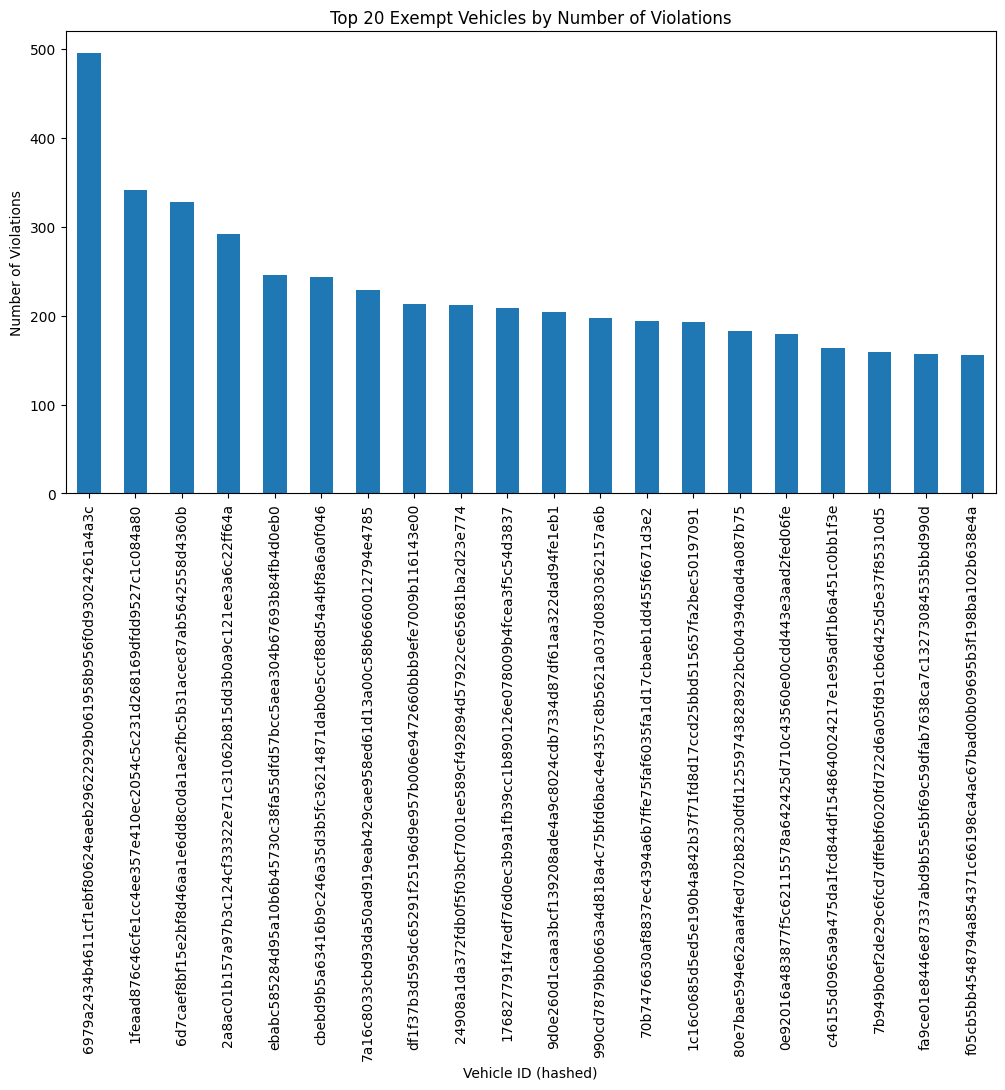

In [5]:
import matplotlib.pyplot as plt

# count violations per vehicle
vehicle_counts = ACE_CBD_exempt_violations_2024['vehicle_id'].value_counts()

# vehicles with more than 1 violation
repeat_offenders = vehicle_counts[vehicle_counts > 1]
print(f"Number of repeat offenders: {len(repeat_offenders)}")
print("Top 10 repeat offenders:")
print(repeat_offenders.head(10))

# top 20 repeat offenders
plt.figure(figsize=(12,6))
repeat_offenders.head(20).plot(kind='bar')
plt.title("Top 20 Exempt Vehicles by Number of Violations")
plt.ylabel("Number of Violations")
plt.xlabel("Vehicle ID (hashed)")
plt.xticks(rotation=90)
plt.show()


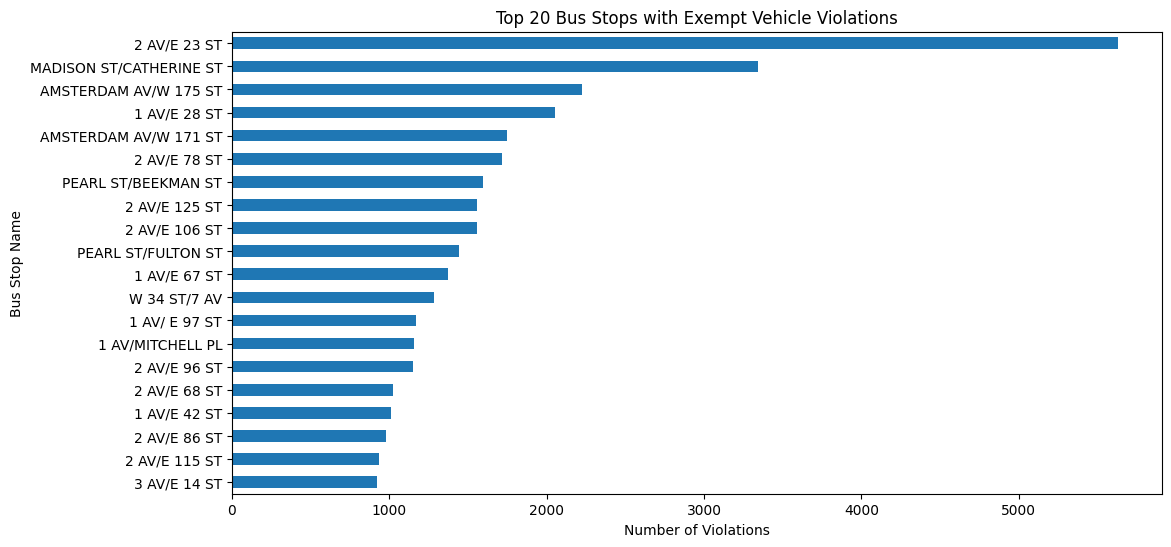

In [6]:
top_stops = ACE_CBD_exempt_violations_2024['stop_name'].value_counts().head(20)

plt.figure(figsize=(12,6))
top_stops.plot(kind='barh')
plt.title("Top 20 Bus Stops with Exempt Vehicle Violations")
plt.xlabel("Number of Violations")
plt.ylabel("Bus Stop Name")
plt.gca().invert_yaxis()
plt.show()


In [7]:
# Get the top stop
top_stop_name = top_stops.index[0]
print(f"Top stop: {top_stop_name}")

# Filter data for this stop
top_stop_data = ACE_CBD_exempt_violations_2024[ACE_CBD_exempt_violations_2024['stop_name'] == top_stop_name]

# Count violations by bus route at this stop
top_routes = top_stop_data['bus_route_id'].value_counts()
print("Bus routes with most violations at this stop:")
print(top_routes)


Top stop: 2 AV/E 23 ST
Bus routes with most violations at this stop:
bus_route_id
M15+    5628
Name: count, dtype: int64


In [56]:
# import folium
# from IPython.display import display

# bus_route = top_routes.index[0]
# route_data = ACE_exempt_violations[ACE_exempt_violations['bus_route_id'] == bus_route]

# route_map = folium.Map(location=[40.75, -73.98], zoom_start=12)

# # plot violation points
# for idx, row in route_data.iterrows():
#     folium.CircleMarker(
#         location=[row['violation_latitude'], row['violation_longitude']],
#         radius=3,
#         color='red',
#         fill=True
#     ).add_to(route_map)

# # add bus stops along the route
# bus_stops = route_data[['bus_stop_latitude', 'bus_stop_longitude', 'stop_name']].drop_duplicates()
# for idx, row in bus_stops.iterrows():
#     folium.Marker(
#         location=[row['bus_stop_latitude'], row['bus_stop_longitude']],
#         popup=row['stop_name'],
#         icon=folium.Icon(color='blue', icon='info-sign')
#     ).add_to(route_map)

# display(route_map)

In [13]:
def write_to_csv(data, output_file, replace=False):
    if os.path.exists(output_file) and not replace:
        logging.info(f"☑️ File '{output_file}' already exists. Skipping write.")
        return

    try:
        if isinstance(data, pd.DataFrame):
            # Handle DataFrame directly
            if data.empty:
                logging.warning("⚠️ No data to write (DataFrame is empty).")
                return
            data.to_csv(output_file, index=False, encoding="utf-8")
            logging.info(f"📄 Successfully wrote {len(data)} rows (DataFrame) to '{output_file}'")

        elif isinstance(data, list):
            # Handle list of dicts
            if not data:
                logging.warning("⚠️ No data to write (list is empty).")
                return
            fieldnames = sorted(set().union(*(d.keys() for d in data)))
            with open(output_file, mode="w", newline="", encoding="utf-8") as f:
                writer = csv.DictWriter(f, fieldnames=fieldnames)
                writer.writeheader()
                writer.writerows(data)
            logging.info(f"📄 Successfully wrote {len(data)} rows (list of dicts) to '{output_file}'")

        else:
            logging.error(f"❌ Unsupported data type: {type(data)}. Expected DataFrame or list of dicts.")

    except Exception as e:
        logging.error(f"❌ Failed to write CSV: {e}")

In [10]:
OUTPUT_ACE_CBD_2024 = os.path.join(DATA_DIR_RAW, "ACE_CBD_exempt_violations_2024.csv")
write_to_csv(ACE_CBD_exempt_violations_2024, OUTPUT_ACE_CBD_2024)

2025-09-22 12:48:52,880 - INFO - ☑️ File '..\..\data\raw\ACE_CBD_exempt_violations_2024.csv' already exists. Skipping write.


## Non-exempt ACE violations

In [11]:
OUTPUT_ACE_NON = os.path.join(DATA_DIR_RAW, "ACE_non_exempt_violations.csv")
ACE_non_exempt_violations = pd.read_csv(OUTPUT_ACE_NON)
ACE_non_exempt_violations.head()

,violation_id,vehicle_id,first_occurrence,last_occurrence,violation_status,violation_type,bus_route_id,violation_latitude,violation_longitude,stop_id,stop_name,bus_stop_latitude,bus_stop_longitude,violation_georeference,bus_stop_georeference
0,488695180,29af8d864d6758cca3c301fabad56e5e27c2bd3688d50f...,2025-08-13T08:12:16.000,2025-08-13T08:18:52.000,VIOLATION ISSUED,MOBILE BUS LANE,BX35,40.849530,-73.934291,403783,WADSWORTH AV/W 181 ST,40.849579,-73.935065,POINT (-73.934291 40.84953),POINT (-73.935065 40.849579)
1,488623774,16888160f975233eacabe8ee726e9bbe5c5faaf72ea7c1...,2025-07-27T21:49:28.000,2025-07-27T22:03:27.000,VIOLATION ISSUED,MOBILE DOUBLE PARKED,BX12+,40.866168,-73.919078,402611,BROADWAY/ISHAM ST,40.868072,-73.919801,POINT (-73.919078 40.866168),POINT (-73.919801 40.868072)
2,488609748,29af8d864d6758cca3c301fabad56e5e27c2bd3688d50f...,2025-08-13T06:05:25.000,2025-08-13T06:12:10.000,VIOLATION ISSUED,MOBILE BUS LANE,BX35,40.849545,-73.934300,403783,WADSWORTH AV/W 181 ST,40.849579,-73.935065,POINT (-73.9343 40.849545),POINT (-73.935065 40.849579)
3,488529079,781d305d8791813421024b6bad6eeb3deccaed9963ae63...,2025-08-11T17:52:43.000,2025-08-11T18:01:09.000,VIOLATION ISSUED,MOBILE BUS LANE,M42,40.757759,-73.990841,401851,W 42 ST/8 AV,40.757575,-73.990464,POINT (-73.99084123526166 40.757758827753094),POINT (-73.990464 40.757575)
4,488522954,8bf36cd143b168030b031f780d8450ed426af44d6449f9...,2025-08-13T08:33:40.000,2025-08-13T09:13:54.000,VIOLATION ISSUED,MOBILE BUS LANE,BX5,40.822709,-73.869633,100280,STORY AV/METCALF AV,40.822549,-73.870532,POINT (-73.86963253251953 40.822709461355764),POINT (-73.870532 40.822549)


In [12]:
ACE_CBD_non_exempt_violations = pd.merge(
    ACE_non_exempt_violations,
    CDB_routes[['route_id']],  # keep only the route_id column from CBD dataset
    left_on='bus_route_id',
    right_on='route_id',
    how='inner'
)

ACE_CBD_non_exempt_violations['first_occurrence'] = pd.to_datetime(ACE_CBD_exempt_violations['first_occurrence'])

ACE_CBD_non_exempt_violations_2024 = ACE_CBD_non_exempt_violations[
    (ACE_CBD_non_exempt_violations['first_occurrence'].dt.year == 2024)
]

ACE_CBD_non_exempt_violations_2024

,violation_id,vehicle_id,first_occurrence,last_occurrence,violation_status,violation_type,bus_route_id,violation_latitude,violation_longitude,stop_id,stop_name,bus_stop_latitude,bus_stop_longitude,violation_georeference,bus_stop_georeference,route_id
123517,466434011,0793aa5cb07e4fe2f0b708322397596b572bb8bb20ce57...,2024-12-31 10:54:43,2025-04-10T10:41:54.000,VIOLATION ISSUED,MOBILE BUS STOP,M15+,40.800044,-73.932396,401727,1 AV/E 116 ST,40.796303,-73.935089,POINT (-73.932396 40.800044),POINT (-73.935089 40.796303),M15+
123520,466433995,f6e5765ff6839c918516f8590ff7d16f4c0cd727a83b70...,2024-12-31 08:31:27,2025-04-10T10:41:12.000,VIOLATION ISSUED,MOBILE BUS STOP,M101,40.776321,-73.955804,403433,3 AV/E 79 ST,40.774605,-73.956970,POINT (-73.955804 40.776321),POINT (-73.95697 40.774605),M101
123525,466433863,b3608c6757c16d1433d98cca64bf29a7eeacd874c61281...,2024-12-31 15:59:11,2025-04-10T10:22:13.000,VIOLATION ISSUED,MOBILE BUS STOP,M15+,40.711928,-73.998177,403601,PEARL ST/BEEKMAN ST,40.708264,-74.003099,POINT (-73.998177 40.711928),POINT (-74.003099 40.708264),M15+
123526,466433834,c97d07bd6e7c1756a5160064e8fcf1ecd83f2d41edbb3c...,2024-12-31 15:59:11,2025-04-10T10:20:34.000,VIOLATION ISSUED,MOBILE BUS STOP,M34+,40.742672,-73.977489,401824,E 34 ST /PARK AV,40.746929,-73.981102,POINT (-73.977489 40.742672),POINT (-73.981102 40.746929),M34+
123875,466418716,575ad6f7c9a7153641b82d41f83f446ea7c64398a299cb...,2024-12-31 10:04:58,2025-04-09T12:42:33.000,VIOLATION ISSUED,MOBILE BUS STOP,M15+,40.771039,-73.953578,401707,1 AV/E 67 ST,40.764870,-73.958109,POINT (-73.953578 40.771039),POINT (-73.958109 40.76487),M15+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199399,453069422,b41ac2d361add954bcd4cd53c139114c070937076f33d0...,2024-01-02 07:18:08,2025-01-08T08:17:05.000,VIOLATION ISSUED,MOBILE BUS STOP,M101,40.776404,-73.955730,403433,3 AV/E 79 ST,40.774605,-73.956970,POINT (-73.95573 40.776404),POINT (-73.95697 40.774605),M101
199401,453069260,7f8c115f68eaf0be32fe77042ad861ac93fa535cb33e69...,2024-01-02 07:05:45,2025-01-06T19:23:42.000,VIOLATION ISSUED,MOBILE BUS STOP,M101,40.848584,-73.930614,402766,AMSTERDAM AV/W 184 ST,40.849558,-73.929899,POINT (-73.930614 40.848584),POINT (-73.929899 40.849558),M101
199402,453069236,cc15e859e5e2b44fd7e02088ba22a59e072d63b66541af...,2024-01-02 07:08:26,2025-01-06T19:12:59.000,VIOLATION ISSUED,MOBILE BUS STOP,M101,40.844157,-73.933845,402769,AMSTERDAM AV/W 178 ST,40.845883,-73.932601,POINT (-73.933845 40.844157),POINT (-73.932601 40.845883),M101
199403,453069219,5e42f3ca0ccfa1586b44aae023f6a54231a78ac785f91c...,2024-01-02 09:00:28,2025-01-06T12:00:16.000,VIOLATION ISSUED,MOBILE BUS LANE,M15+,40.730257,-73.983355,903093,1 AV/E 1 ST,40.724012,-73.987802,POINT (-73.983355 40.730257),POINT (-73.987802 40.724012),M15+


In [ ]:
OUTPUT_ACE_NON_CBD_2024 = os.path.join(DATA_DIR_RAW, "ACE_CBD_non_exempt_violations_2024.csv")
write_to_csv(ACE_CBD_exempt_violations_2024, OUTPUT_ACE_NON_CBD_2024)

2025-09-22 17:36:05,980 - INFO - 📄 Successfully wrote 75476 rows (DataFrame) to '..\..\data\raw\ACE_CBD_non_exempt_violations_2024.csv'
